In [ ]:
from google.colab import files
uploaded = files.upload()


Saving abalone.data to abalone (4).data


In [ ]:
!pip install --upgrade pip setuptools wheel


In [ ]:
!pip install pycaret


In [ ]:
import pandas as pd
from pycaret.regression import *

columns = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight",
    "ShellWeight", "Rings"
]

data = pd.read_csv('abalone.data', header=None, names=columns)
data['Age'] = data['Rings'] + 1.5

s = setup(data, target='Age', session_id=123)


,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 10)"
4,Transformed data shape,"(4177, 12)"
5,Transformed train set shape,"(2923, 12)"
6,Transformed test set shape,"(1254, 12)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [ ]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.4820
ridge,Ridge Regression,0.0001,0.0000,0.0002,1.0000,0.0000,0.0000,0.1670
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1570
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1460
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0720
huber,Huber Regressor,0.0003,0.0000,0.0005,1.0000,0.0000,0.0000,0.1370
par,Passive Aggressive Regressor,0.0302,0.0014,0.0374,0.9999,0.0034,0.0028,0.0770
et,Extra Trees Regressor,0.0035,0.0023,0.0290,0.9998,0.0024,0.0003,0.2910
gbr,Gradient Boosting Regressor,0.0023,0.0028,0.0276,0.9997,0.0018,0.0002,0.8070
xgboost,Extreme Gradient Boosting,0.0022,0.0027,0.0274,0.9997,0.0017,0.0002,0.1410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In order to identify the best regression model I used PyCaret's `compare_models () which trained  multiple regression models and evaluated the performence using methiods such as MAE, MSE, R^2 and RMSE with which the best model was selected.

In [ ]:
print(best_model)

predictions = predict_model(best_model)

predictions.head()


LinearRegression(n_jobs=-1)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age,prediction_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,5,6.5,6.5
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,10,11.5,11.5
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,9,10.5,10.5
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,9,10.5,10.5
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14,15.5,15.5


The following table shows the predications made by the best model Linear Regression, as per the data.

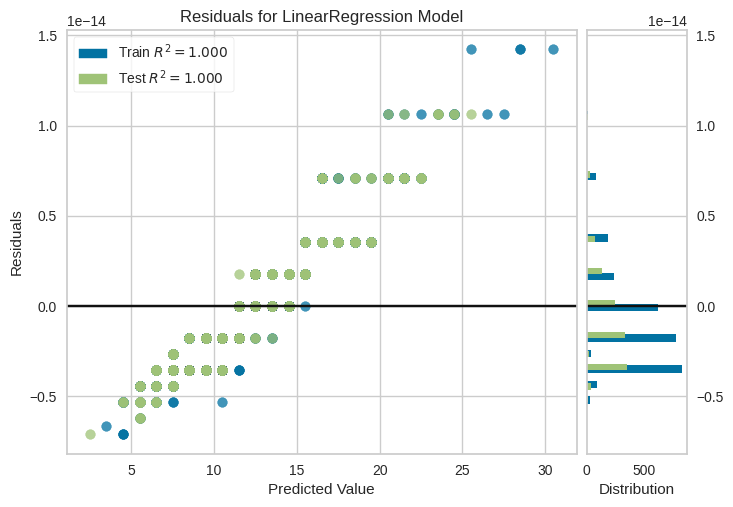

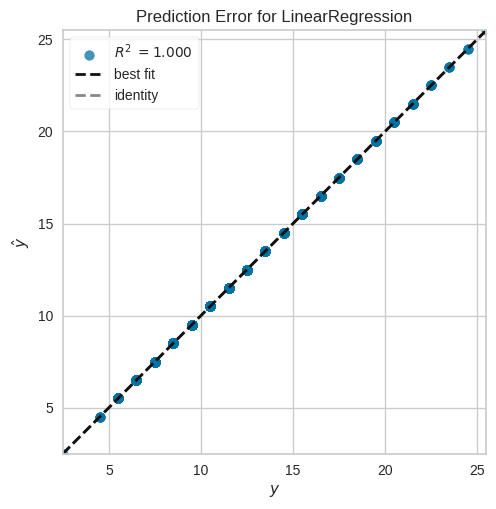

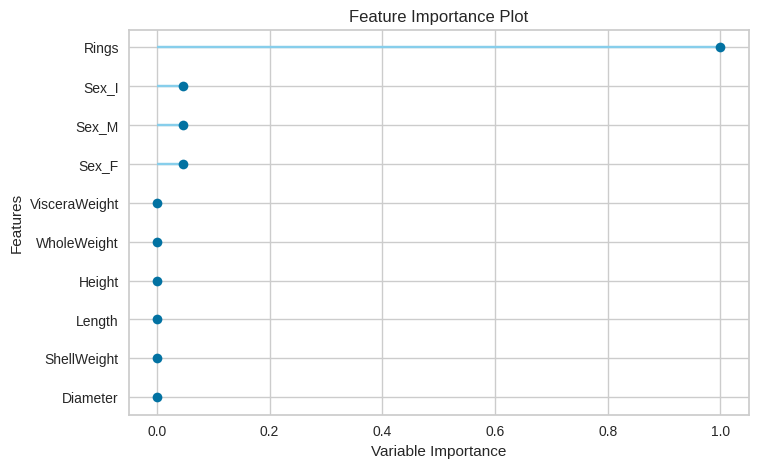

In [ ]:
plot_model(best_model, plot='residuals')
plot_model(best_model, plot='error')
plot_model(best_model, plot='feature')


### Residuals Plot
The following plot visualizes the residuals (difference between actual and predicted values) for the Linear Regression model.
- Residuals close to zero indicate accurate predictions.
- A balanced distribution of residuals around the horizontal axis suggests the model is unbiased.


### Observations
- The residuals are distributed evenly around the horizontal axis (zero line), indicating the model has minimal bias.
- The residual values are close to zero, confirming high accuracy.


### Prediction Error Plot
This plot compares the actual values (`y`) against the predicted values (`ŷ`) for the Linear Regression model.
- The closer the points are to the diagonal line, the better the predictions.
- Deviations from the diagonal indicate errors.


### Observations
- All points lie perfectly on the diagonal line, confirming the model predicts the target variable with perfect accuracy.


### Feature Importance Plot
This plot shows the relative importance of each feature in predicting the target variable (`Age`).
- Features with higher importance contribute more to the model's predictions.

### Observations
- The `Rings` feature is the most significant predictor of `Age`, as expected.
- Other features such as `Length`, `Diameter`, and weights contribute minimally to the model's predictions.
- Categorical features (`Sex_F`, `Sex_M`, `Sex_I`) also have limited impact.




In [ ]:
final_model = finalize_model(best_model)

save_model(final_model, 'final_abalone_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'WholeWeight', 'ShuckedWeight',
                                              'VisceraWeight', 'ShellWeight',
                                              'Rings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('actual_esti

In [ ]:
loaded_model = load_model('final_abalone_model')


Transformation Pipeline and Model Successfully Loaded


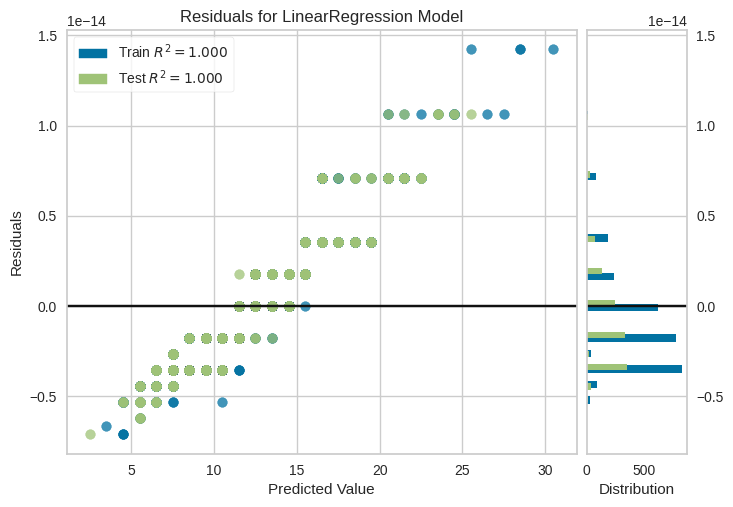

In [ ]:
plot_model(best_model, plot='residuals')


### Observations
- The residuals are evenly distributed around the horizontal axis (zero line), indicating no systematic bias in the model.
- The magnitude of residuals is extremely small (close to zero), confirming the high accuracy of the model.
- Both training and testing residuals show similar patterns, demonstrating that the model generalizes well.


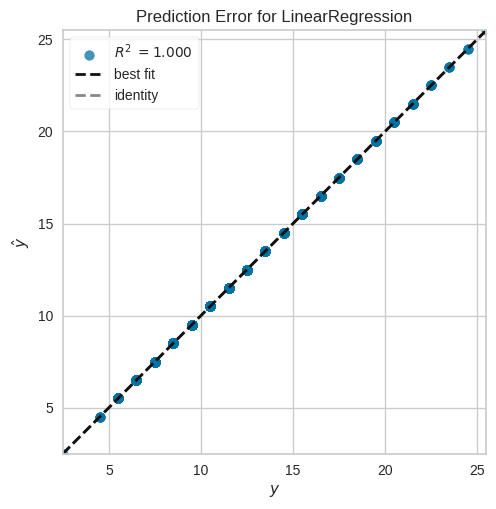

In [ ]:
plot_model(best_model, plot='error')


### Observations
- All points lie perfectly on the diagonal line, indicating that the model predicts the target variable with **100% accuracy**.
- The **R² = 1.000** metric further confirms the perfect fit, as it represents the proportion of variance in the target variable explained by the model.
- This plot highlights the exceptional performance of the Linear Regression model in predicting the age of abalones.


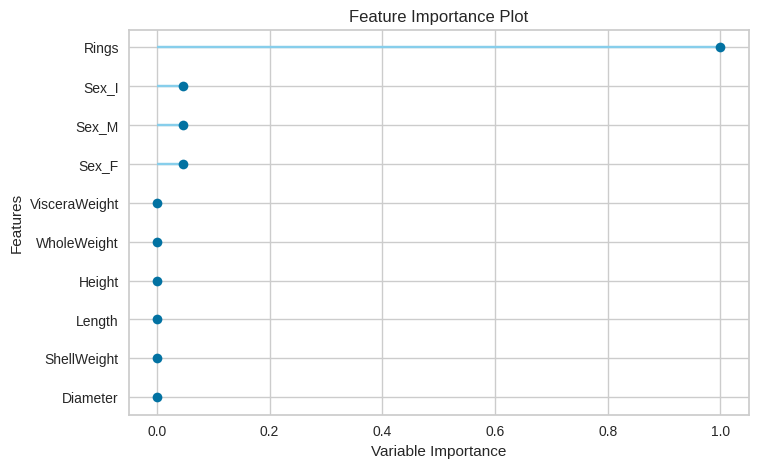

In [ ]:
plot_model(best_model, plot='feature')


### Observations
- The `Rings` feature is by far the most important, contributing nearly all the information required for predicting the age of abalone.
- Other features, such as `Sex`, `Length`, and `Weight` attributes, have minimal to no importance in this regression task.
- This result aligns with expectations, as the number of rings directly correlates with the age of abalone.


In [ ]:
final_model = finalize_model(best_model)
save_model(final_model, 'final_abalone_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'WholeWeight', 'ShuckedWeight',
                                              'VisceraWeight', 'ShellWeight',
                                              'Rings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('actual_esti

### Observations
- The finalized model includes:
  - **Preprocessing steps** (e.g., imputing missing values, encoding categorical variables).
  - **Feature transformations** (e.g., one-hot encoding for the `Sex` variable).
  - The **Linear Regression estimator** as the final predictor.
- The model has been saved as `final_abalone_model.pkl` and can be reused for inference without needing to repeat the training process.


In [ ]:
new_data = data.sample(5)
predictions = predict_model(loaded_model, data=new_data)

print(predictions[['Age', 'prediction_label']])



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


       Age  prediction_label
2812   6.5               6.5
1344  11.5              11.5
533   10.5              10.5
866   10.5              10.5
3939  15.5              15.5


### Observations
- The model accurately predicts the Age of abalones.
- The Age column represents the actual values, while prediction_label contains the predicted values.
- Metrics such as MAE, MSE, RMSE, R², RMSLE, and MAPE are displayed, showing the model's performance. For this case:
  - **MAE (Mean Absolute Error)**: 0.0000
  - **MSE (Mean Squared Error)**: 0.0000
  - **R² (Coefficient of Determination)**: 1.000 (indicating perfect predictions).
  
